In [1]:
from pathlib import Path

import numpy as np
from scipy.spatial import ConvexHull

zr_dir = Path('../config/zoom_region')
zr = {}

# Load points
zr['orig'] = np.loadtxt(str(zr_dir / 'z2h350.txt'))
shift = np.array([-67, -45, -89]) / (2 ** 8)
rads = list(range(2, 7))
for rad in rads:
    zr[f'rad{rad}'] = np.loadtxt(str(zr_dir / f'z2h350_ref13_rad{rad}.txt'))
    zr[f'rad{rad}'] -= shift

# Convert to convex hull
labels = ['orig'] + [f'rad{rad}' for rad in rads]
print('Convex hull volume (scaled by orig):')
for label in labels:
    zr[label] = ConvexHull(zr[label])
    volume = zr[label].volume / zr['orig'].volume
    print(label, f'{volume:.2f}')

Convex hull volume (scaled by orig):
orig 1.00
rad2 0.63
rad3 0.81
rad4 1.08
rad5 1.37
rad6 1.72


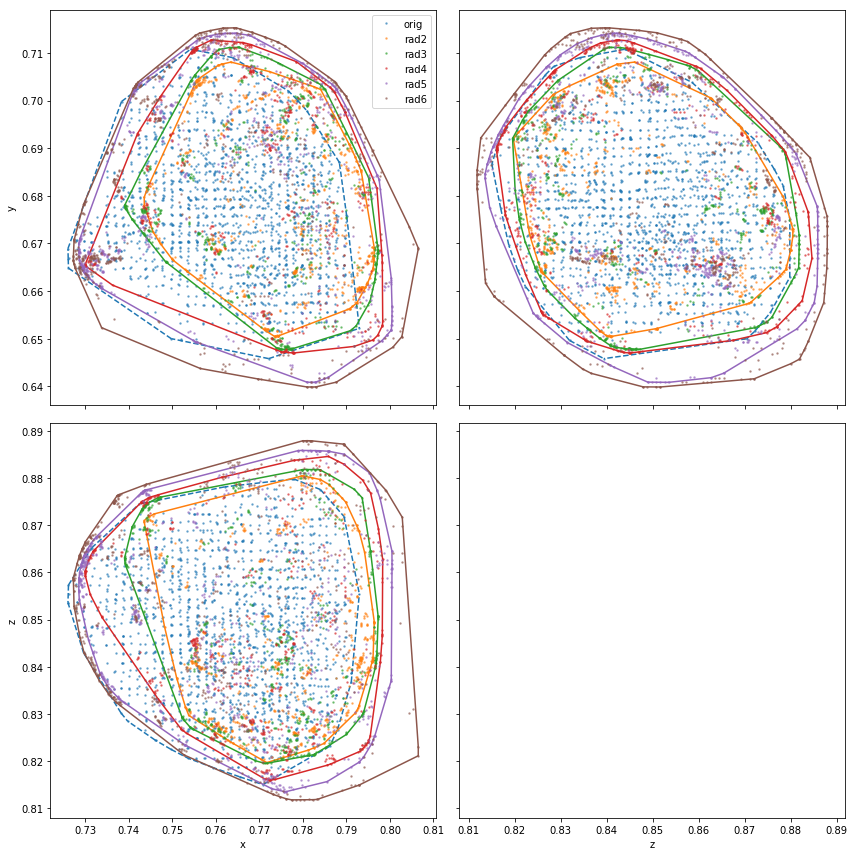

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_hull(points, c, ls, ax):
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], c=c, ls=ls)

def plot(xaxis, yaxis, ax):
    for label in ['orig'] + [f'rad{rad}' for rad in rads]:
        hull = zr[label]
        points = hull.points[:, [xaxis, yaxis]]
        x, y = points.T
        l, = ax.plot(x, y, '.', ms=3, alpha=0.5, label=label)
        ls = '-'
        if label == 'orig':
            ls = '--'
        plot_hull(points, l.get_color(), ls, ax)

fig, ax = plt.subplots(2, 2, sharex='col', sharey='row',
                       figsize=(12, 12))
plot(0, 1, ax[0, 0])
ax[0, 0].legend()
ax[0, 0].set_ylabel('y')
plot(2, 1, ax[0, 1])
plot(0, 2, ax[1, 0])
ax[1, 0].set_ylabel('z')
ax[1, 0].set_xlabel('x')
ax[1, 1].set_xlabel('z')
plt.tight_layout()
fig.savefig('zoom_region.pdf')